In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r"C:\Users\ROOPSHREE\Downloads\loan_prediction.csv")

In [3]:
df.head()

,ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,INCOME,COAPPLICANT_INCOME,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.sample(10)

,ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,INCOME,COAPPLICANT_INCOME,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
222,LP001744,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban,Y
355,LP002144,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
522,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
99,LP001343,Male,Yes,0,Graduate,No,1759,3541.0,131.0,360.0,1.0,Semiurban,Y
203,LP001688,Male,Yes,1,Not Graduate,No,3500,1083.0,135.0,360.0,1.0,Urban,Y
514,LP002652,Male,No,0,Graduate,No,5815,3666.0,311.0,360.0,1.0,Rural,N
227,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  614 non-null    object 
 1   GENDER              601 non-null    object 
 2   MARRIED             611 non-null    object 
 3   DEPENDENTS          599 non-null    object 
 4   EDUCATION           614 non-null    object 
 5   SELF_EMPLOYED       582 non-null    object 
 6   INCOME              614 non-null    int64  
 7   COAPPLICANT_INCOME  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

In [7]:
df.dtypes

ID                     object
GENDER                 object
MARRIED                object
DEPENDENTS             object
EDUCATION              object
SELF_EMPLOYED          object
INCOME                  int64
COAPPLICANT_INCOME    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [8]:
df.isnull().sum()

ID                     0
GENDER                13
MARRIED                3
DEPENDENTS            15
EDUCATION              0
SELF_EMPLOYED         32
INCOME                 0
COAPPLICANT_INCOME     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [9]:
df.describe()

,INCOME,COAPPLICANT_INCOME,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# number of missing values 

In [11]:
df.isnull().sum()

ID                     0
GENDER                13
MARRIED                3
DEPENDENTS            15
EDUCATION              0
SELF_EMPLOYED         32
INCOME                 0
COAPPLICANT_INCOME     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [12]:
# dropping the missing values

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

ID                    0
GENDER                0
MARRIED               0
DEPENDENTS            0
EDUCATION             0
SELF_EMPLOYED         0
INCOME                0
COAPPLICANT_INCOME    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# label Encoding

In [16]:
 df.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)

In [17]:
df.head()

,ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,INCOME,COAPPLICANT_INCOME,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [18]:
# Dependent column Values
df['DEPENDENTS'].value_counts()

0     274
2      85
1      80
3+     41
Name: DEPENDENTS, dtype: int64

In [19]:
#Replacing  the value 3+ to 4
df = df.replace(to_replace='3+', value= 4)

In [20]:
df['DEPENDENTS'].value_counts()

0    274
2     85
1     80
4     41
Name: DEPENDENTS, dtype: int64

# Data Visualization

<Axes: xlabel='EDUCATION', ylabel='count'>

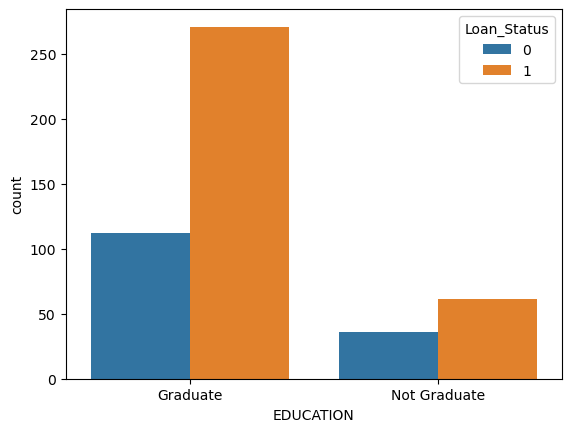

In [21]:
# education and loan status
sns.countplot(x='EDUCATION' , hue='Loan_Status', data = df)

<Axes: xlabel='MARRIED', ylabel='count'>

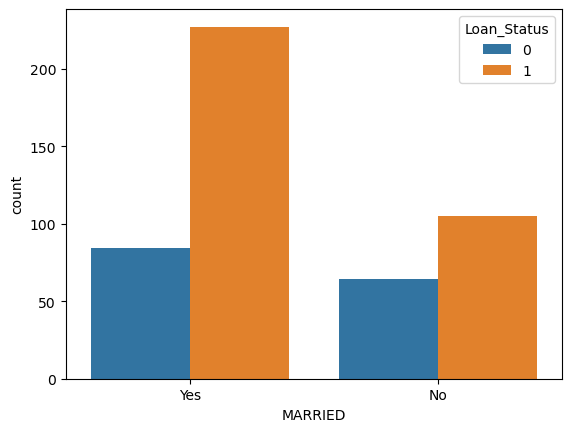

In [22]:
# marital status and loan status
sns.countplot(x ='MARRIED', hue ='Loan_Status', data = df)

<Axes: xlabel='GENDER', ylabel='count'>

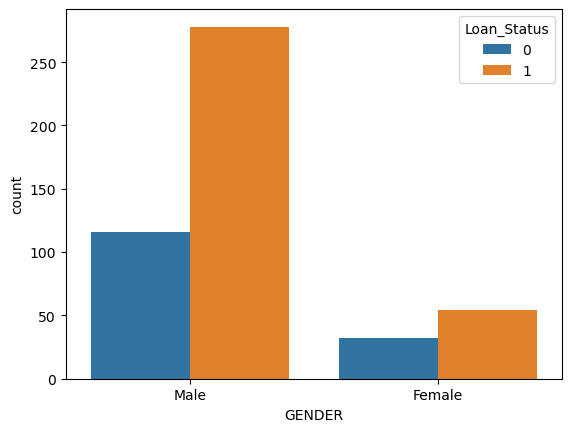

In [23]:
# Gender & loan status
sns.countplot(x = 'GENDER', hue='Loan_Status', data = df)

In [24]:
# convert categorical columns to Numerical values
df.replace({'MARRIED':{'No':0,'Yes':1},'GENDER':{'Male':1,'Female':0},'SELF_EMPLOYED':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'EDUCATION':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
df

,ID,GENDER,MARRIED,DEPENDENTS,EDUCATION,SELF_EMPLOYED,INCOME,COAPPLICANT_INCOME,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [26]:
# seperating the data and label
X = df.drop(columns = ['ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [27]:
print(X)


     GENDER  MARRIED DEPENDENTS  EDUCATION  SELF_EMPLOYED  INCOME  \
1         1        1          1          1              0    4583   
2         1        1          0          1              1    3000   
3         1        1          0          0              0    2583   
4         1        0          0          1              0    6000   
5         1        1          2          1              1    5417   
..      ...      ...        ...        ...            ...     ...   
609       0        0          0          1              0    2900   
610       1        1          4          1              0    4106   
611       1        1          1          1              0    8072   
612       1        1          2          1              0    7583   
613       0        0          0          1              1    4583   

     COAPPLICANT_INCOME  Loan_Amount  Loan_Amount_Term  Credit_History  \
1                1508.0        128.0             360.0             1.0   
2                   0.0

In [28]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test Split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


# Training The Model
# support Vector 

In [31]:
from sklearn import svm

In [32]:
classifier = svm.SVC(kernel = 'linear')

In [33]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

# Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [36]:
print('Accuracy on training data :',training_data_accuracy)

Accuracy on training data : 0.8072916666666666


In [37]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [38]:
print('Accuracy on test data :',test_data_accuracy)

Accuracy on test data : 0.7083333333333334
